<a href="https://colab.research.google.com/github/faiz-DE/WEB3_TRADING_BEHAVIOUR_ANALYSIS/blob/main/Sentiment_analysis_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**IMPORTING REQUIRED LIBRARIES**



In [ ]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**LOADING DATA SET**

In [ ]:
from google.colab import files
uploaded = files.upload()

fear_greed = pd.read_csv('fear_greed_index.csv')
trader_data = pd.read_csv('historical_data.csv')



Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv


In [ ]:
fear_greed.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
trader_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
fear_greed.shape


(2644, 4)

In [ ]:
trader_data.shape

(211224, 16)

In [ ]:
fear_greed.dtypes

,0
timestamp,int64
value,int64
classification,object
date,object


In [ ]:
# Above in the data coloum the data is in object we will convert into date and time
fear_greed['date'] = pd.to_datetime(fear_greed['date'])
fear_greed.dtypes

,0
timestamp,int64
value,int64
classification,object
date,datetime64[ns]


In [ ]:
fear_greed

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [ ]:
fear_greed['classification'].value_counts()

,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


In [ ]:
# check missing values in fear_gread dataset
fear_greed.isnull().sum() # it means there are no null values

,0
timestamp,0
value,0
classification,0
date,0


In [ ]:
# check for the duplicates
fear_greed.duplicated().sum() # no duplicates

np.int64(0)

In [ ]:
fear_greed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [ ]:
# now we will perform EDA onto the trader data
trader_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [ ]:
# we will only keep useful rows for out analysis
trader_data = trader_data[['Account', 'Coin', 'Execution Price', 'Size USD', 'Side', 'Direction', 'Timestamp', 'Closed PnL', 'Start Position', 'Fee']]

In [ ]:
trader_data = trader_data.rename(columns={
    "Account": "account",
    "Coin": "coin",
    "Execution Price": "execution_price",
    "Size USD": "size_usd",
    "Side": "side",
    "Timestamp IST": "timestamp",
    "Start Position": "start_position",
    "Direction": "direction",
    "Closed PnL": "closed_pnl",
    "Fee": "fee",
})


In [ ]:
trader_data.head()

,account,coin,execution_price,size_usd,side,direction,Timestamp,closed_pnl,start_position,fee
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,BUY,Buy,1.730000e+12,0.0,0.000000,0.345404
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,127.68,BUY,Buy,1.730000e+12,0.0,986.524596,0.005600
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,1150.63,BUY,Buy,1.730000e+12,0.0,1002.518996,0.050431
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,1142.04,BUY,Buy,1.730000e+12,0.0,1146.558564,0.050043
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,69.75,BUY,Buy,1.730000e+12,0.0,1289.488521,0.003055


In [ ]:
trader_data.duplicated().sum() # finally duplicates are removed

np.int64(10)

In [ ]:
trader_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   account          211224 non-null  object 
 1   coin             211224 non-null  object 
 2   execution_price  211224 non-null  float64
 3   size_usd         211224 non-null  float64
 4   side             211224 non-null  object 
 5   direction        211224 non-null  object 
 6   Timestamp        211224 non-null  float64
 7   closed_pnl       211224 non-null  float64
 8   start_position   211224 non-null  float64
 9   fee              211224 non-null  float64
dtypes: float64(6), object(4)
memory usage: 16.1+ MB


In [ ]:
#changing colunm name to understand more clear
trader_data = trader_data.rename(columns={"start_position" : "leverage"})
trader_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   account          211224 non-null  object 
 1   coin             211224 non-null  object 
 2   execution_price  211224 non-null  float64
 3   size_usd         211224 non-null  float64
 4   side             211224 non-null  object 
 5   direction        211224 non-null  object 
 6   Timestamp        211224 non-null  float64
 7   closed_pnl       211224 non-null  float64
 8   leverage         211224 non-null  float64
 9   fee              211224 non-null  float64
dtypes: float64(6), object(4)
memory usage: 16.1+ MB


In [ ]:
# now we will check for the outliers in [execution_price, size usd , levearage, closed pnl]

trader_data[['execution_price','size_usd','leverage','closed_pnl']].describe()

,execution_price,size_usd,leverage,closed_pnl
count,211224.000000,2.112240e+05,2.112240e+05,211224.000000
mean,11414.723350,5.639451e+03,-2.994625e+04,48.749001
std,29447.654868,3.657514e+04,6.738074e+05,919.164828
min,0.000005,0.000000e+00,-1.433463e+07,-117990.104100
25%,4.854700,1.937900e+02,-3.762311e+02,0.000000
50%,18.280000,5.970450e+02,8.472793e+01,0.000000
75%,101.580000,2.058960e+03,9.337278e+03,5.792797
max,109004.000000,3.921431e+06,3.050948e+07,135329.090100


In [ ]:
# here outliere are lying in Leverage and closed_pnl colum ( we can see the diffrence between mean and median)
# we will remove the outliers using interquartile range methodology
# first find Q1 (25% percentile) & Q3 (75% percentile)

Q1_lev = trader_data['leverage'].quantile(0.25)
Q3_lev = trader_data['leverage'].quantile(0.75)

IQR_lev = Q3_lev - Q1_lev
lower_bound = Q1_lev - 1.5 * IQR_lev
upper_bound = Q3_lev + 1.5 * IQR_lev

outliers_lev = trader_data[(trader_data['leverage'] < lower_bound) | (trader_data['leverage'] > upper_bound)]
print("leverage outliers count:", outliers_lev.shape[0])



leverage outliers count: 58346


In [ ]:
# remove outliers
trader_data = trader_data[(trader_data['leverage'] >= lower_bound) & (trader_data['leverage'] <= upper_bound)]


In [ ]:
trader_data.describe()

,execution_price,size_usd,Timestamp,closed_pnl,leverage,fee
count,152878.000000,1.528780e+05,1.528780e+05,152878.000000,152878.000000,152878.000000
mean,15767.110222,6.832189e+03,1.737633e+12,39.032748,1661.042929,1.436013
std,33608.652857,4.241583e+04,8.894490e+09,897.281668,5863.125960,7.756063
min,0.000005,0.000000e+00,1.680000e+12,-117990.104100,-14944.000000,-1.175712
25%,13.810000,2.004825e+02,1.740000e+12,0.000000,-89.040050,0.018488
50%,23.251000,6.477000e+02,1.740000e+12,0.000000,22.229650,0.103711
75%,1769.700000,2.309230e+03,1.740000e+12,4.673006,2426.139556,0.479962
max,109004.000000,3.921431e+06,1.750000e+12,135329.090100,23904.700000,837.471593


In [ ]:
# same removing outlier from closed_pnl
Q1_lev = trader_data['closed_pnl'].quantile(0.25)
Q3_lev = trader_data['closed_pnl'].quantile(0.75)
IQR_lev = Q3_lev - Q1_lev
lower_bound = Q1_lev - 1.5 * IQR_lev
upper_bound = Q3_lev + 1.5 * IQR_lev

outliers_lev = trader_data[(trader_data['closed_pnl'] < lower_bound) | (trader_data['closed_pnl'] > upper_bound)]
print("closed_pnl outliers count:", outliers_lev.shape[0])

closed_pnl outliers count: 35164


In [ ]:
# remove outliers from closed_pnl
trader_data = trader_data[(trader_data['leverage'] >= lower_bound) & (trader_data['leverage'] <= upper_bound)]


In [ ]:
trader_data.describe()

,execution_price,size_usd,Timestamp,closed_pnl,leverage,fee
count,27629.000000,2.762900e+04,2.762900e+04,27629.000000,27629.000000,27629.000000
mean,59331.697737,1.193699e+04,1.735538e+12,18.343251,1.112250,2.885377
std,41655.071400,4.733614e+04,1.133693e+10,292.426719,3.192408,9.444238
min,0.000005,0.000000e+00,1.680000e+12,-18993.468420,-7.006510,-1.175712
25%,2720.800000,2.492000e+02,1.730000e+12,0.000000,0.000000,0.023566
50%,82901.000000,1.043570e+03,1.740000e+12,0.000000,0.160030,0.191988
75%,94619.000000,8.210450e+03,1.740000e+12,0.072416,1.876320,1.868761
max,109004.000000,2.834011e+06,1.750000e+12,7371.796392,11.680980,649.941862


In [ ]:
trader_data.shape # after removing outliers

(27629, 10)

In [ ]:
trader_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27629 entries, 0 to 211013
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   account          27629 non-null  object 
 1   coin             27629 non-null  object 
 2   execution_price  27629 non-null  float64
 3   size_usd         27629 non-null  float64
 4   side             27629 non-null  object 
 5   direction        27629 non-null  object 
 6   Timestamp        27629 non-null  float64
 7   closed_pnl       27629 non-null  float64
 8   leverage         27629 non-null  float64
 9   fee              27629 non-null  float64
dtypes: float64(6), object(4)
memory usage: 2.3+ MB


In [ ]:
trader_data['Timestamp'] = pd.to_numeric(trader_data['Timestamp'], errors='coerce')
# coerce will converrt the data into NaN if it is not posibble to change the type into int or float
trader_data['Timestamp'] = pd.to_datetime(trader_data['Timestamp'], unit='ms')

In [ ]:
trader_data.head()

,account,coin,execution_price,size_usd,side,direction,Timestamp,closed_pnl,leverage,fee
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,BUY,Buy,2024-10-27 03:33:20,0.000000,0.000000,0.345404
64,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.0300,1755.67,BUY,Open Long,2024-10-27 03:33:20,0.000000,0.000000,0.614485
65,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.0400,2120.06,BUY,Open Long,2024-10-27 03:33:20,0.000000,7.470000,0.742021
122,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0390,89.31,SELL,Sell,2024-10-27 03:33:20,11.971214,9.888602,0.031256
188,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,240.9400,149.38,SELL,Close Long,2024-10-27 03:33:20,4.887398,0.620000,0.052283


In [ ]:
trader_data['date'] = trader_data['Timestamp'].dt.date

In [ ]:
trader_data.head()

,account,coin,execution_price,size_usd,side,direction,Timestamp,closed_pnl,leverage,fee,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,BUY,Buy,2024-10-27 03:33:20,0.000000,0.000000,0.345404,2024-10-27
64,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.0300,1755.67,BUY,Open Long,2024-10-27 03:33:20,0.000000,0.000000,0.614485,2024-10-27
65,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.0400,2120.06,BUY,Open Long,2024-10-27 03:33:20,0.000000,7.470000,0.742021,2024-10-27
122,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0390,89.31,SELL,Sell,2024-10-27 03:33:20,11.971214,9.888602,0.031256,2024-10-27
188,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,240.9400,149.38,SELL,Close Long,2024-10-27 03:33:20,4.887398,0.620000,0.052283,2024-10-27


In [ ]:
trader_data.isnull().sum()

,0
account,0
coin,0
execution_price,0
size_usd,0
side,0
direction,0
Timestamp,0
closed_pnl,0
leverage,0
fee,0


In [ ]:
trader_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27629 entries, 0 to 211013
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   account          27629 non-null  object        
 1   coin             27629 non-null  object        
 2   execution_price  27629 non-null  float64       
 3   size_usd         27629 non-null  float64       
 4   side             27629 non-null  object        
 5   direction        27629 non-null  object        
 6   Timestamp        27629 non-null  datetime64[ns]
 7   closed_pnl       27629 non-null  float64       
 8   leverage         27629 non-null  float64       
 9   fee              27629 non-null  float64       
 10  date             27629 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 3.5+ MB


In [ ]:
# the date data type is in object we will change it into datetime
trader_data['date'] = pd.to_datetime(trader_data['date'])
trader_data.dtypes

,0
account,object
coin,object
execution_price,float64
size_usd,float64
side,object
direction,object
Timestamp,datetime64[ns]
closed_pnl,float64
leverage,float64
fee,float64


In [ ]:
# both data set has been cleaned now we will mergge them to perform our further analysis
final_df = pd.merge(trader_data , fear_greed , on='date' , how='inner')

In [ ]:
final_df.shape

(24574, 14)

In [ ]:
final_df[['execution_price', 'size_usd', 'closed_pnl', 'leverage', 'fee', 'value']].describe()


,execution_price,size_usd,closed_pnl,leverage,fee,value
count,24574.000000,2.457400e+04,24574.000000,24574.000000,24574.000000,24574.000000
mean,56913.820398,1.157692e+04,19.059142,1.113380,2.875871,53.747213
std,41975.964309,4.020612e+04,297.417643,3.153054,8.049387,15.135651
min,0.000005,0.000000e+00,-18993.468420,-7.006510,-1.175712,44.000000
25%,2388.000000,2.490125e+02,0.000000,0.000000,0.030551,44.000000
50%,81360.000000,1.081485e+03,0.000000,0.148750,0.214032,44.000000
75%,95530.750000,8.946235e+03,0.133408,1.904017,2.088742,74.000000
max,109004.000000,2.834011e+06,7371.796392,11.680980,236.197304,84.000000


In [ ]:
final_df['classification'].value_counts()
# Majority of Trades happen on fear days

,count
classification,
Fear,16542
Greed,4603
Extreme Greed,2451
Neutral,978


In [ ]:
final_df[['closed_pnl', 'size_usd', 'leverage', 'value']].corr()


,closed_pnl,size_usd,leverage,value
closed_pnl,1.000000,0.094916,0.014601,-0.008465
size_usd,0.094916,1.000000,0.061346,-0.042362
leverage,0.014601,0.061346,1.000000,-0.097382
value,-0.008465,-0.042362,-0.097382,1.000000


**FURTHER INSIGHTS ANALYSIS**

**1. Identify which sentiment days have more trading activity**

In [ ]:
trade_count = final_df['classification'].value_counts
print(trade_count)

<bound method IndexOpsMixin.value_counts of 0        Greed
1        Greed
2        Greed
3        Greed
4        Greed
         ...  
24569     Fear
24570     Fear
24571     Fear
24572     Fear
24573     Fear
Name: classification, Length: 24574, dtype: object>


/tmp/ipython-input-2356922460.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, x='classification',order=['Extreme Fear','Fear','Neutral','Greed','Extreme Greed'],palette='pastel')


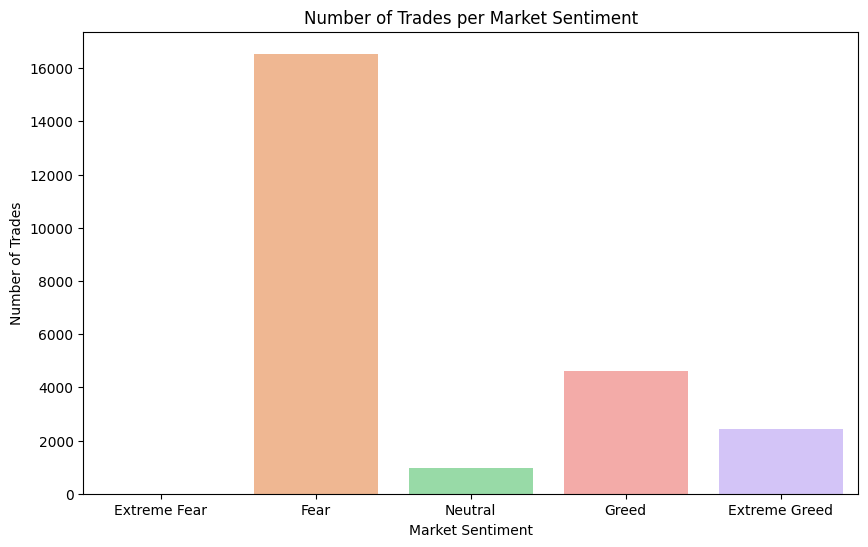

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=final_df, x='classification',order=['Extreme Fear','Fear','Neutral','Greed','Extreme Greed'],palette='pastel')
plt.title('Number of Trades per Market Sentiment')
plt.ylabel('Number of Trades')
plt.xlabel('Market Sentiment')
plt.show()

**2. Find average profitability per market sentiment.**

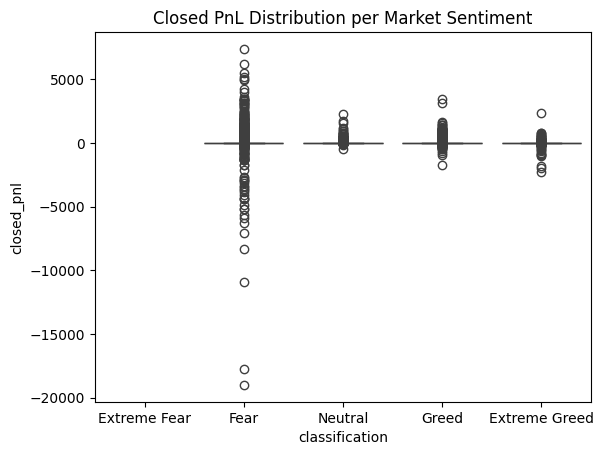

In [ ]:
sns.boxplot(data=final_df, x='classification', y='closed_pnl',order=['Extreme Fear','Fear','Neutral','Greed','Extreme Greed'])
plt.title('Closed PnL Distribution per Market Sentiment')
plt.show()

**3. Determine trade size trends across market sentiment**

In [ ]:
# trade volume vs sentiment
volume_stats = final_df.groupby('classification')['size_usd'].describe( )
print(volume_stats)

                  count          mean           std   min       25%      50%  \
classification                                                                 
Extreme Greed    2451.0   8692.709033  14348.818210  0.01  173.6300  2284.96   
Fear            16542.0  12988.661957  47489.669764  0.00  222.2025  1023.60   
Greed            4603.0   9345.642440  19417.332952  0.00  271.1800  1110.46   
Neutral           978.0   5428.428978   8210.717405  0.00  554.4200  1793.92   

                      75%         max  
classification                         
Extreme Greed   9916.9950   100219.77  
Fear            8679.1175  2834011.35  
Greed           9665.8850   548305.49  
Neutral         7073.8500    75001.03  


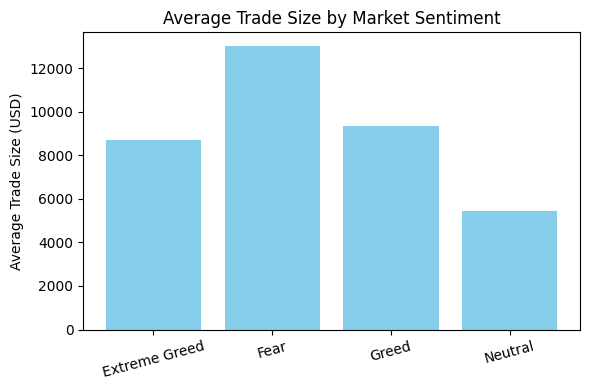

In [ ]:
avg_trade_size = volume_stats['mean']

plt.figure(figsize=(6,4))
plt.bar(avg_trade_size.index, avg_trade_size.values, color='skyblue')
plt.ylabel('Average Trade Size (USD)')
plt.title('Average Trade Size by Market Sentiment')
plt.xticks(rotation=15)   # rotate labels if needed
plt.tight_layout()
plt.show()

**4.  Check if traders take higher leverage on Fear / Greed days.**

In [ ]:
# HIGH LEVRAGE TRADE KAB HO RAHE HE (FEAR/GREED) ME

volume_leverage = final_df.groupby('classification')[['size_usd', 'leverage']].mean()
print(volume_leverage)

                    size_usd  leverage
classification                        
Extreme Greed    8692.709033  0.440617
Fear            12988.661957  1.283042
Greed            9345.642440  0.724362
Neutral          5428.428978  1.760665


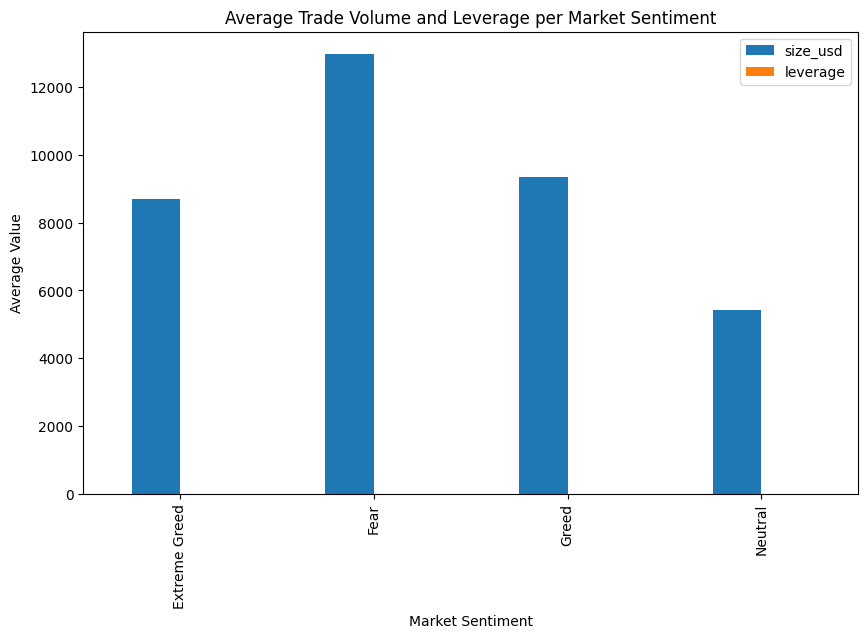

In [ ]:
volume_leverage.plot(kind='bar', figsize=(10,6))
plt.title('Average Trade Volume and Leverage per Market Sentiment')
plt.ylabel('Average Value')
plt.xlabel('Market Sentiment')
plt.show()

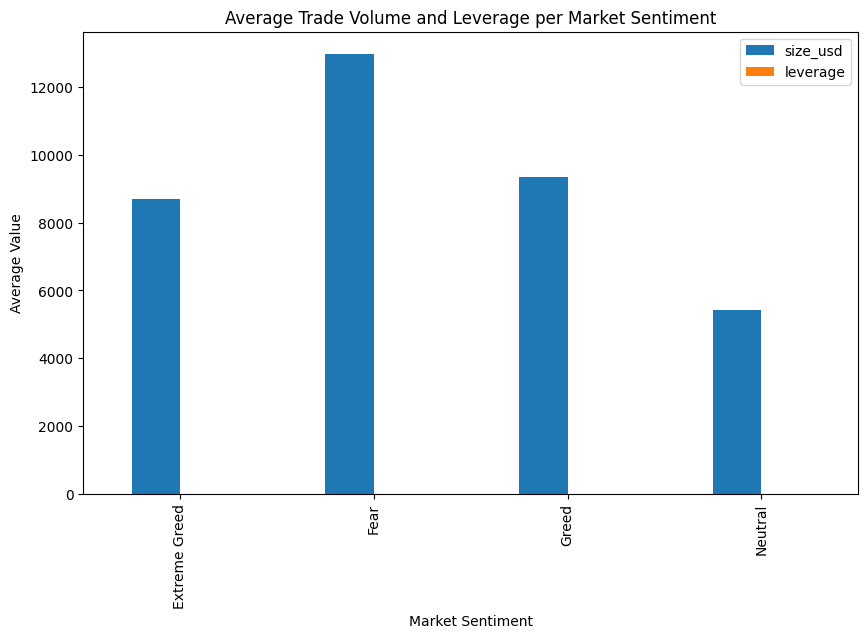

In [ ]:
volume_leverage.plot(kind='bar', figsize=(10,6))
plt.title('Average Trade Volume and Leverage per Market Sentiment')
plt.ylabel('Average Value')
plt.xlabel('Market Sentiment')
plt.show()

**side/direction vs sentiment**

In [ ]:
# TRADERS FEAR KE DIN KIYA DIRECTIOON LETE HE LONG / SHORT
side_sentiment  = final_df.groupby(['classification', 'side']).size().unstack()
print(side_sentiment)

side             BUY  SELL
classification            
Extreme Greed   1291  1160
Fear            9127  7415
Greed           2385  2218
Neutral          490   488


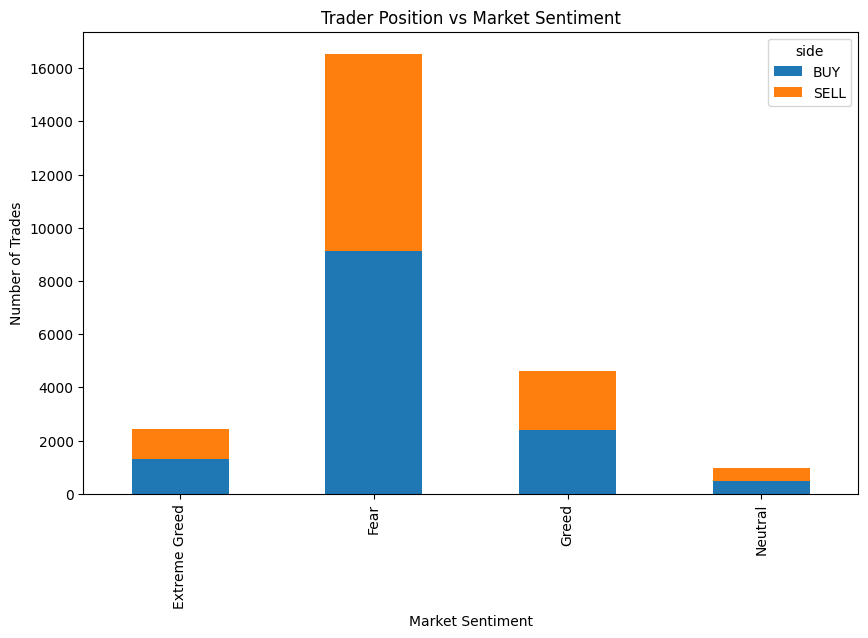

In [ ]:
side_sentiment.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Trader Position vs Market Sentiment')
plt.ylabel('Number of Trades')
plt.xlabel('Market Sentiment')
plt.show()

In [ ]:
final_df['direction'].value_counts()

,count
direction,
Open Long,10273
Close Long,5753
Open Short,5172
Close Short,2402
Buy,585
Sell,224
Spot Dust Conversion,98
Long > Short,34
Short > Long,33


In [ ]:
final_df.head()

,account,coin,execution_price,size_usd,side,direction,Timestamp,closed_pnl,leverage,fee,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,BUY,Buy,2024-10-27 03:33:20,0.000000,0.000000,0.345404,2024-10-27,1730007000,74,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.0300,1755.67,BUY,Open Long,2024-10-27 03:33:20,0.000000,0.000000,0.614485,2024-10-27,1730007000,74,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.0400,2120.06,BUY,Open Long,2024-10-27 03:33:20,0.000000,7.470000,0.742021,2024-10-27,1730007000,74,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0390,89.31,SELL,Sell,2024-10-27 03:33:20,11.971214,9.888602,0.031256,2024-10-27,1730007000,74,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,240.9400,149.38,SELL,Close Long,2024-10-27 03:33:20,4.887398,0.620000,0.052283,2024-10-27,1730007000,74,Greed
